In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL3Nrb2pha3UtYWRtaW4vRG9jdW1lbnRzL3Byb2plY3RzL2FwcGxpZWQtc29mdC1jb21wL2RvY3MvbGVjdHVyZS1ub3RlL20wMy10ZXh0'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

/var/folders/j7/9dgqq5g53vnbsbmvh2yqtckr0000gr/T/ipykernel_47382/3548943389.py:25: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/Users/skojaku-admin/miniforge3/envs/applsoftcomp/lib/python3.10/importlib/_bootstrap.py": 1703345986.9647622, "/Users/skojaku-admin/miniforge3/envs/applsoftcomp/lib/python3.10/importlib/_bootstrap_external.py": 1703345986.9687936, "/Users/skojaku-admin/miniforge3/envs/applsoftcomp/lib/python3.10/codecs.py": 1703345984.5304527, "/Users/skojaku-admin/miniforge3/envs/applsoftcomp/lib/python3.10/encodings/aliases.py": 1703345985.7136338, "/Users/skojaku-admin/miniforge3/envs/applsoftcomp/lib/python3.10/encodings/__init__.py": 1703345985.707323, "/Users/skojaku-admin/miniforge3/envs/applsoftcomp/lib/python3.10/encodings/utf_8.py": 1703345986.387034, "/Users/skojaku-admin/miniforge3/envs/applsoftcomp/lib/python3.10/abc.py": 1703345984.4232924, "/Users/skojaku-admin/miniforge3/envs/applsoftcomp/lib/python3.10/io.py": 1703345984.6479, "/Users/skojaku-admin/miniforge3/envs/applsoftcomp/lib/python3.10/stat.py": 1703345984.8209362, "/Users/skojaku-admin/miniforge3/envs/applsoftcomp/lib/python3

In [2]:
from transformers import AutoTokenizer
import os

model_name = "microsoft/phi-1.5"
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [3]:
#| code-fold: true
print(f"Vocabulary size: {tokenizer.vocab_size:,} tokens")
print(f"Max sequence length: {tokenizer.model_max_length} tokens")

Vocabulary size: 50,257 tokens
Max sequence length: 2048 tokens


In [4]:
text = "Binghamton University."

tokens = tokenizer.tokenize(text) # Tokenize the text

In [5]:
#| code-fold: true
print(f"Tokens: {tokens}")

Tokens: ['B', 'ingham', 'ton', 'ĠUniversity', '.']


In [6]:
#| code-fold: true

texts = [
    "Bearcats",
    "New York",
]

print("Word tokenization examples:\n")
for text in texts:
    tokens = tokenizer.tokenize(text)
    print(f"{text:10s} → {tokens}")

Word tokenization examples:

Bearcats   → ['Bear', 'cats']
New York   → ['New', 'ĠYork']


In [7]:
#| code-fold: true

text = "Binghamton University"

# Get token IDs
token_ids = tokenizer.encode(text, add_special_tokens=False)
tokens = tokenizer.tokenize(text)

print("Token → Token ID mapping:\n")
for token, token_id in zip(tokens, token_ids):
    print(f"{token:10s} → {token_id:6d}")

Token → Token ID mapping:

B          →     33
ingham     →  25875
ton        →   1122
ĠUniversity →   2059


In [8]:
# Get the full vocabulary
vocab = tokenizer.get_vocab()

# Sample some tokens
sample_tokens = list(vocab.items())[:5]
for token, id in sample_tokens:
    print(f"  {id:6d}: '{token}'")

   24670: 'Mex'
   31018: 'lves'
   28554: 'Ġenhancement'
   26022: 'eight'
   33950: 'reciation'


In [9]:
token_id = [50256] # the token ID of <|endoftext|>
token = tokenizer.convert_ids_to_tokens(token_id)[0]
print(f"Token ID: {token_id} → Token: {token}")

Token ID: [50256] → Token: <|endoftext|>


In [10]:
from transformers import AutoModelForCausalLM
import torch

# load the model
model = AutoModelForCausalLM.from_pretrained(model_name)

# Retrieve the embedding layer
embedding_layer = model.model.embed_tokens

In [11]:
#| code-fold: true
print(embedding_layer.weight[:5, :10])

tensor([[ 0.0097, -0.0155,  0.0603,  0.0326, -0.0108, -0.0271, -0.0273,  0.0178,
         -0.0242,  0.0100],
        [ 0.0243,  0.0543,  0.0178, -0.0679, -0.0130,  0.0265, -0.0423, -0.0287,
         -0.0051, -0.0179],
        [-0.0416,  0.0370, -0.0160, -0.0254, -0.0371, -0.0208, -0.0023,  0.0647,
          0.0468,  0.0013],
        [-0.0051, -0.0044,  0.0248, -0.0489,  0.0399,  0.0005, -0.0070,  0.0148,
          0.0030,  0.0070],
        [ 0.0289,  0.0362, -0.0027, -0.0775, -0.0136, -0.0203, -0.0566, -0.0558,
          0.0269, -0.0067]], grad_fn=<SliceBackward0>)


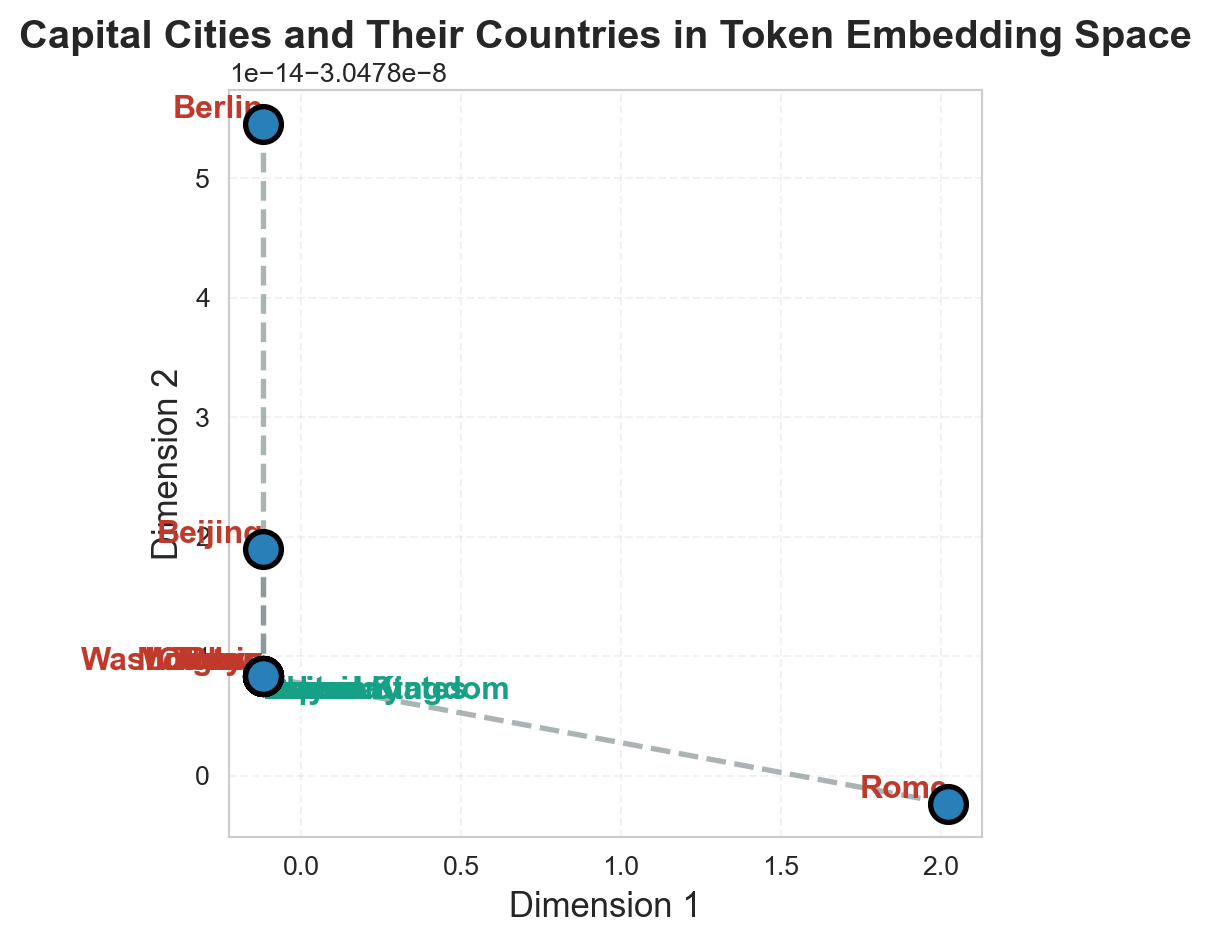

In [12]:
#| code-fold: true
#| fig-cap: Capital cities and their countries are close in the token embedding space, even before transformer processing.

import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# List of (capital, country) pairs for visualization
capital_country_pairs = [
    ("washington", "united states"),
    ("london", "united kingdom"),
    ("paris", "france"),
    ("berlin", "germany"),
    ("tokyo", "japan"),
    ("moscow", "russia"),
    ("beijing", "china"),
    ("rome", "italy"),
    ("ottawa", "canada")
]

# Flatten to unique terms for quick token lookup
terms = sorted(list(set([city for city, _ in capital_country_pairs] + [country for _, country in capital_country_pairs])))
term_ids = [tokenizer.convert_tokens_to_ids(term) for term in terms]
term_embeddings = embedding_layer.weight[term_ids].detach().cpu().numpy()

# 2D reduction using PCA
pca = PCA(n_components=2, random_state=42)
term_2d = pca.fit_transform(term_embeddings)

# Map term to 2D coordinate for annotation and matching
coords = {term: term_2d[i] for i, term in enumerate(terms)}

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(5, 5))

ax.scatter(term_2d[:,0], term_2d[:,1], s=180, color="#2980b9", edgecolors='black', linewidth=2, zorder=10)

# Draw line and annotate each pair (capital, country)
for (city, country) in capital_country_pairs:
    city_xy = coords[city]
    country_xy = coords[country]
    ax.annotate(city.title(), city_xy, fontsize=12, fontweight='bold', ha='right', va='bottom', color='#c0392b')
    ax.annotate(country.title(), country_xy, fontsize=12, fontweight='bold', ha='left', va='top', color='#16a085')
    ax.plot([city_xy[0], country_xy[0]], [city_xy[1], country_xy[1]], color='#7f8c8d', linestyle='--', linewidth=2, alpha=0.65, zorder=1)

ax.set_xlabel("Dimension 1", fontsize=13)
ax.set_ylabel("Dimension 2", fontsize=13)
ax.set_title("Capital Cities and Their Countries in Token Embedding Space", fontsize=15, fontweight='bold')
ax.grid(alpha=0.25, linestyle='--')

plt.tight_layout()
plt.show()

In [13]:
#| code-fold: true

text = "Binghamton University offers excellent programs."

print("=" * 70)
print("COMPLETE PIPELINE: TEXT → EMBEDDINGS")
print("=" * 70)

# Step 1: Tokenization
print("\n[STEP 1] Tokenization")
tokens = tokenizer.tokenize(text)
print(f"  Text:   '{text}'")
print(f"  Tokens: {tokens}")

# Step 2: Convert to IDs
print("\n[STEP 2] Token IDs")
token_ids = tokenizer.convert_tokens_to_ids(tokens)
for token, tid in zip(tokens, token_ids):
    print(f"  '{token}' → {tid}")

# Step 3: Add special tokens
print("\n[STEP 3] Add Special Tokens")
inputs = tokenizer(text, return_tensors="pt", add_special_tokens=True)
full_tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])
print(f"  {full_tokens}")

# Step 4: Lookup embeddings
print("\n[STEP 4] Lookup in Embedding Table")
print(f"  Embedding table shape: {embedding_layer.weight.shape}")
print(f"  Each token → 768-dim vector")

# Step 5: Get contextualized embeddings
print("\n[STEP 5] Pass Through Transformer Layers")
with torch.no_grad():
    outputs = model(**inputs, output_hidden_states=True)
    contextualized = outputs.hidden_states[-1]

print(f"  Input:  {inputs['input_ids'].shape} (token IDs)")
print(f"  Output: {contextualized.shape} (contextualized embeddings)")

print("\n[RESULT] Each token now has context-aware meaning!")
print("  Before: Static embedding from table")
print("  After:  Refined by attention across all tokens")
print("=" * 70)

COMPLETE PIPELINE: TEXT → EMBEDDINGS

[STEP 1] Tokenization
  Text:   'Binghamton University offers excellent programs.'
  Tokens: ['B', 'ingham', 'ton', 'ĠUniversity', 'Ġoffers', 'Ġexcellent', 'Ġprograms', '.']

[STEP 2] Token IDs
  'B' → 33
  'ingham' → 25875
  'ton' → 1122
  'ĠUniversity' → 2059
  'Ġoffers' → 4394
  'Ġexcellent' → 6275
  'Ġprograms' → 4056
  '.' → 13

[STEP 3] Add Special Tokens
  ['B', 'ingham', 'ton', 'ĠUniversity', 'Ġoffers', 'Ġexcellent', 'Ġprograms', '.']

[STEP 4] Lookup in Embedding Table
  Embedding table shape: torch.Size([51200, 2048])
  Each token → 768-dim vector

[STEP 5] Pass Through Transformer Layers


  Input:  torch.Size([1, 8]) (token IDs)
  Output: torch.Size([1, 8, 2048]) (contextualized embeddings)

[RESULT] Each token now has context-aware meaning!
  Before: Static embedding from table
  After:  Refined by attention across all tokens


In [14]:
#| code-fold: true

word = "binghamton"

# Tokenize
tokens = tokenizer.tokenize(word)
print(f"Word: '{word}'")
print(f"Tokens: {tokens}")
print(f"Number of tokens: {len(tokens)}")

# Count 'n' in original
n_count_actual = word.count('n')
print(f"\nActual 'n' count in word: {n_count_actual}")

# Count 'n' in tokens
n_count_tokens = sum(token.replace('##', '').count('n') for token in tokens)
print(f"'n' count visible in tokens: {n_count_tokens}")

if n_count_actual != n_count_tokens:
    print("\n⚠️  The tokenizer splits 'binghamton' in a way that might")
    print("    make it harder for the model to count letters!")

Word: 'binghamton'
Tokens: ['bing', 'ham', 'ton']
Number of tokens: 3

Actual 'n' count in word: 2
'n' count visible in tokens: 2


In [15]:
#| code-fold: true

def analyze_tokenization(texts, tokenizer):
    """Analyze how a tokenizer handles a corpus."""
    total_tokens = 0
    total_unk = 0
    max_length_exceeded = 0

    for text in texts:
        token_ids = tokenizer.encode(text, add_special_tokens=True)
        total_tokens += len(token_ids)
        total_unk += token_ids.count(tokenizer.unk_token_id) if hasattr(tokenizer, 'unk_token_id') else 0
        if len(token_ids) > tokenizer.model_max_length:
            max_length_exceeded += 1

    print(f"Corpus statistics:")
    print(f"  Total documents: {len(texts)}")
    print(f"  Total tokens: {total_tokens:,}")
    print(f"  Avg tokens/doc: {total_tokens / len(texts):.1f}")
    print(f"  Unknown tokens: {total_unk} ({100 * total_unk / total_tokens:.2f}%)")
    print(f"  Docs exceeding max length: {max_length_exceeded}")

# Example corpus
corpus = [
    "Binghamton University is located in upstate New York.",
    "The university offers excellent computer science programs.",
    "Students enjoy the beautiful campus and vibrant community."
]

analyze_tokenization(corpus, tokenizer)

Corpus statistics:
  Total documents: 3
  Total tokens: 29
  Avg tokens/doc: 9.7
  Unknown tokens: 0 (0.00%)
  Docs exceeding max length: 0
